In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [109]:
train = pd.read_csv('adult.csv')

In [110]:
train.head()

,age,workclass,fnlwgt,education,education.num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [111]:
train['capital_gain'] = train['capital_gain'].replace(0,np.nan)

In [112]:
train['capital_loss'] = train['capital_loss'].replace(0,np.nan)

In [113]:
#data['native-country'] = data['native-country'].replace('?',np.nan)

In [114]:
mean_value_gain=train['capital_gain'].mean()
train['capital_gain']=train['capital_gain'].fillna(mean_value_gain)
mean_value_loss=train['capital_loss'].mean()
train['capital_loss']=train['capital_loss'].fillna(mean_value_loss)

In [115]:
train.head()

,age,workclass,fnlwgt,education,education.num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,12938.541298,4356.0,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,12938.541298,4356.0,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,12938.541298,4356.0,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,12938.541298,3900.0,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,12938.541298,3900.0,40,United-States,<=50K


In [116]:
train['workclass']=train['workclass'].replace('?',np.nan)
train['occupation']=train['occupation'].replace('?',np.nan)
train['native.country']=train['native.country'].replace('?',np.nan)

In [117]:
train.head()

,age,workclass,fnlwgt,education,education.num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,12938.541298,4356.0,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,12938.541298,4356.0,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,12938.541298,4356.0,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,12938.541298,3900.0,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,12938.541298,3900.0,40,United-States,<=50K


In [118]:
train.drop(['education'], axis=1, inplace=True)
train.drop(['fnlwgt'], axis=1, inplace=True)
train.drop(['native.country'], axis=1, inplace=True)

In [119]:
#data = data.drop(['marital-status','relationship','race','native-country'], axis=1)
#data1 = data1.drop(['marital-status','relationship','race','native-country'], axis=1)

In [120]:
train

,age,workclass,education.num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,12938.541298,4356.000000,40,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,12938.541298,4356.000000,18,<=50K
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,12938.541298,4356.000000,40,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,12938.541298,3900.000000,40,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,12938.541298,3900.000000,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,12938.541298,1871.428571,40,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,12938.541298,1871.428571,38,<=50K
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,12938.541298,1871.428571,40,>50K
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,12938.541298,1871.428571,40,<=50K


In [121]:
train['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [142]:
train['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [122]:
#replace_map = {train['workclass']: {'Private': 1, 'Self-emp-not-inc': 2, 'Local-gov': 3, 'State-gov': 4,'Self-emp-inc': 5, 'Federal-gov': 6, 'Without-pay': 7 , 'Never-worked': 8 }}
train['workclass']=train['workclass'].fillna('Private')
train['occupation']=train['occupation'].fillna('Prof-specialty')

In [123]:
mapping = {'<=50K': 0, '>50K': 1}
map_train = train.replace({'income':mapping})

In [124]:
map_train

,age,workclass,education.num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,12938.541298,4356.000000,40,0
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,12938.541298,4356.000000,18,0
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,12938.541298,4356.000000,40,0
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,12938.541298,3900.000000,40,0
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,12938.541298,3900.000000,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,12938.541298,1871.428571,40,0
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,12938.541298,1871.428571,38,0
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,12938.541298,1871.428571,40,1
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,12938.541298,1871.428571,40,0


In [125]:
categorical=['race','sex','relationship','marital_status','occupation','workclass']
for feature in categorical:
    le = LabelEncoder()
    map_train[feature] = le.fit_transform(map_train[feature])
    #test[feature] = le.fit_transform(test[feature])

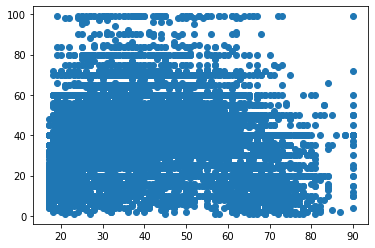

,age,workclass,education.num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
0,90,3,9,6,9,1,4,0,12938.541298,4356.0,40,0
1,82,3,9,6,3,1,4,0,12938.541298,4356.0,18,0
2,66,3,10,6,9,4,2,0,12938.541298,4356.0,40,0
3,54,3,4,0,6,4,4,0,12938.541298,3900.0,40,0
4,41,3,10,5,9,3,4,0,12938.541298,3900.0,40,0


In [126]:
plt.scatter(map_train.age,map_train.hours_per_week)
plt.show()
map_train.head()

In [152]:
X= map_train.drop('income',axis=1)
y= map_train['income']

In [153]:
map_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
age               32561 non-null int64
workclass         32561 non-null int32
education.num     32561 non-null int64
marital_status    32561 non-null int32
occupation        32561 non-null int32
relationship      32561 non-null int32
race              32561 non-null int32
sex               32561 non-null int32
capital_gain      32561 non-null float64
capital_loss      32561 non-null float64
hours_per_week    32561 non-null int64
income            32561 non-null int64
dtypes: float64(2), int32(6), int64(4)
memory usage: 2.2 MB


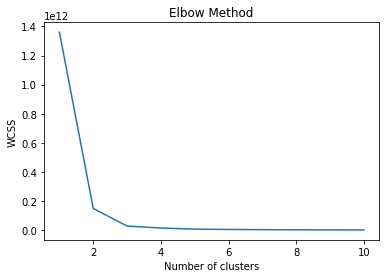

In [154]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [155]:
kmeans = KMeans(n_clusters=2,random_state=5, init='k-means++')
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [156]:
centroids

array([[3.85434850e+01, 3.09237084e+00, 1.00667551e+01, 2.61443738e+00,
        6.13443615e+00, 1.45043516e+00, 3.66563792e+00, 6.68261218e-01,
        1.25113265e+04, 1.87142857e+03, 4.03915190e+01],
       [4.63584906e+01, 3.51572327e+00, 1.29182390e+01, 2.08176101e+00,
        7.01886792e+00, 6.16352201e-01, 3.71069182e+00, 8.61635220e-01,
        9.99990000e+04, 1.87142857e+03, 4.97987421e+01]])

In [157]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [158]:
y_predicted=kmeans.fit_predict(X)
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [172]:
#plt.scatter(X_train.values[:,0],X_train.values[:,10],c= y,s=30,cmap=plt.cm.Paired)
#plt.show()

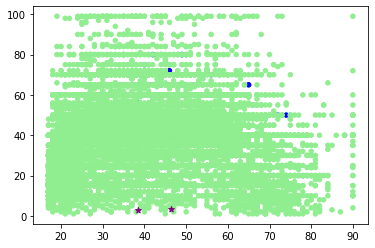

In [168]:
color_theme=np.array(['lightgreen','blue'])

#plt.scatter(x= X_train.age,y=X_train.hours_per_week, s=20, c='red')
plt.scatter(x= X_train.age,y=X_train.hours_per_week, s=20, c=color_theme[labels])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*')

In [169]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [170]:
accuracy_score(X_test,y_predicted)

0.7640735849636068

In [171]:
f1_score(X_test,y_predicted)

0.03975